In [97]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import sys
sys.path.append("../src")
from preprocess import preprocess_string
from graph import graph_metrics
from predict_ml import predict_string_with_ml

In [47]:
TEST_SIZE=0.1

In [35]:
# df = pd.read_json('../data/healthcare_facilities_reviews.jsonl', lines=True)
# df['clean_content'] = df.loc[:, 'content'].apply(preprocess_string)

df = pd.read_csv('../data/cleaned_df.csv')
df.drop(columns=['Unnamed: 0', 'review_id'], inplace=True)

In [36]:
df.head()

,category,title,content,sentiment,source_url,clean_content
0,Поликлиники стоматологические,Классный мастер,Огромное спасибо за чудесное удаление двух зуб...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2727539,огромный спасибо чудесный удаление зуб мудрост...
1,Поликлиники стоматологические,Замечательный врач,Хочу выразить особую благодарность замечательн...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2302877,хотеть выразить особый благодарность замечател...
2,Поликлиники стоматологические,Благодарность работникам рентгена,Добрый вечер! Хотелось бы поблагодарить сотруд...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2815031,добрый вечер хотеться поблагодарить сотрудник ...
3,Поликлиники стоматологические,Доктор Рабинович,Женщины советского образца в регистратуре не и...,negative,http://www.spr.ru/forum_vyvod.php?id_tema=3443161,женщина советский образец регистратура не имет...
4,Поликлиники стоматологические,Есть кому сказать спасибо,У меня с детства очень плохие зубы (тонкая и х...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2592430,детство очень плохой зуб тонкий хрупкий эмаль ...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70597 entries, 0 to 70596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       70597 non-null  object
 1   title          70597 non-null  object
 2   content        70597 non-null  object
 3   sentiment      70597 non-null  object
 4   source_url     70597 non-null  object
 5   clean_content  70597 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


In [38]:
df['sentiment'].value_counts(normalize=True)

sentiment
positive    0.586696
negative    0.413304
Name: proportion, dtype: float64

In [50]:
vectorizer = TfidfVectorizer(
    max_features=6000,
    ngram_range=(1,3),
    min_df=5,
    sublinear_tf=True
)

In [51]:
encoder = {
    'negative': 0,
    'positive': 1
}

In [52]:
X, y = vectorizer.fit_transform(df['clean_content']), df['sentiment'].map(encoder)

In [54]:
X.shape, y.shape

((70597, 6000), (70597,))

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=TEST_SIZE, stratify=y)

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


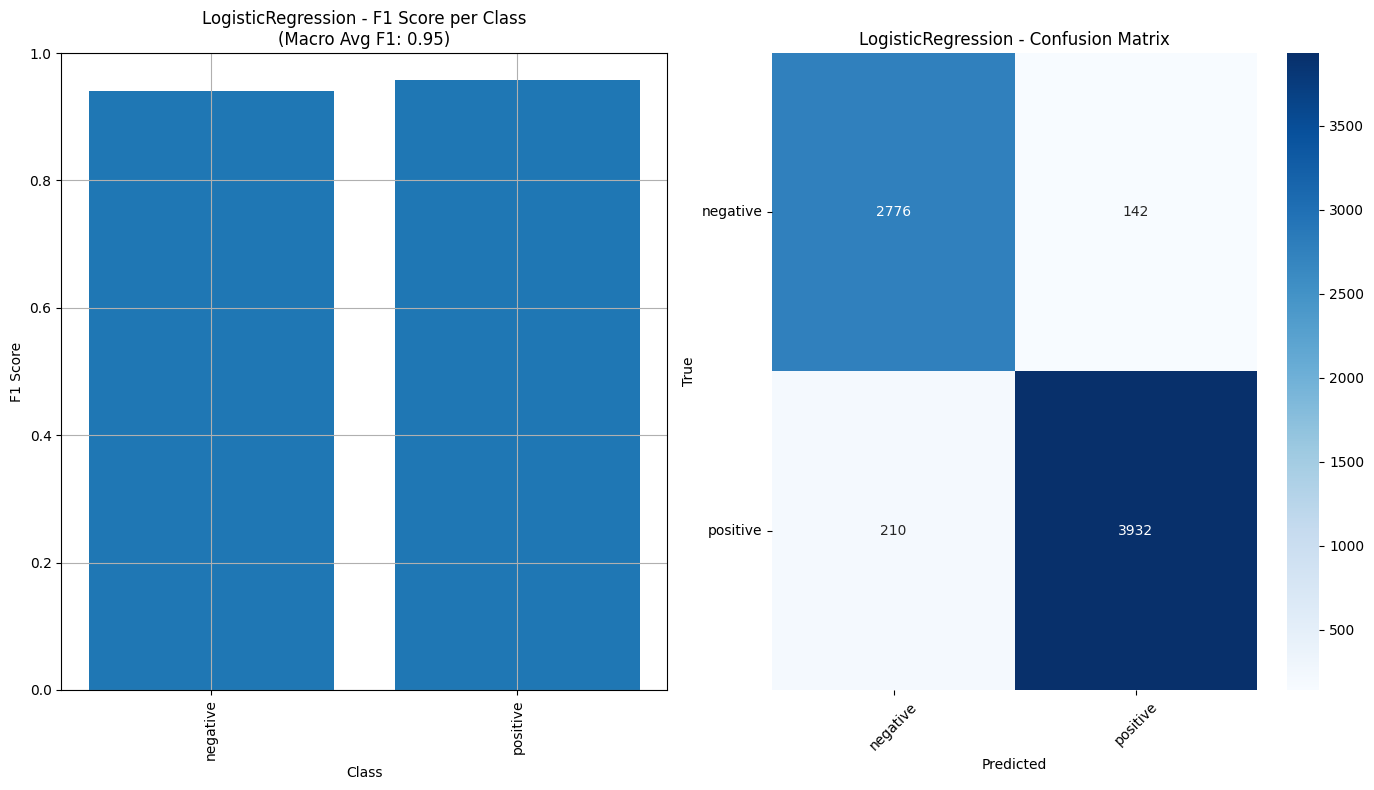

In [67]:
decoder = {
        0:'negative',
        1:'positive'
}

graph_metrics(lr, 'LogisticRegression', X_valid, y_valid, decoder)

In [98]:
df['content'][0]

'Огромное спасибо за чудесное удаление двух зубов мудрости за мгновение, доктор Матвеев! Профессионал с большой буквы. Боялась страшно, но все заняло реально 10 секунд, и я согласилась на удаление сразу и второго зуба! Без боли и страха. Очень рекомендую.'

In [99]:
predict_string_with_ml(lr, vectorizer, df['content'][0])

'positive'

In [101]:
joblib.dump(lr, 'logreg_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [ ]:
# logreg = joblib.load('logreg_model.joblib')
# vectorizer = joblib.load('tfidf_vectorizer.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'logreg_model.joblib'